In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load Training data
df_train = pd.read_csv('train.csv')
print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [3]:
#Load test data
df_test = pd.read_csv('test.csv')
print(df_test.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [4]:
#Check for missing values
missing_count = (df_train.isnull().sum()/len(df_train))*100
missing_count = missing_count[missing_count > 0]
print(missing_count.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


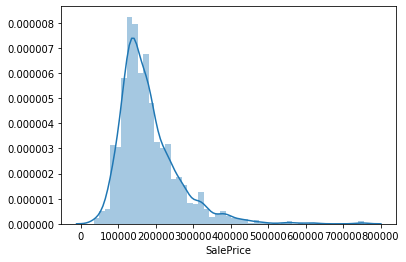

In [5]:
#Visualize distribution of target variable
sns.distplot(df_train['SalePrice'])

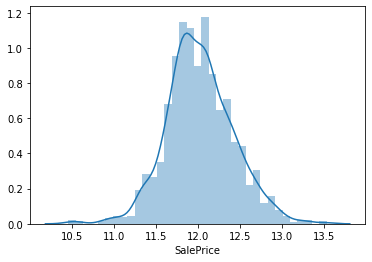

In [6]:
#We use log to transform the target variable so it can be normally distributed
target = np.log(df_train['SalePrice'])
sns.distplot(target)

In [7]:
#Checking for cateorical data
numeric_data = df_train.select_dtypes(include = [np.number])
categorical_data = df_train.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical features in the training data'.format(numeric_data.shape[1], categorical_data.shape[1]))

There are 38 numerical and 43 categorical features in the training data


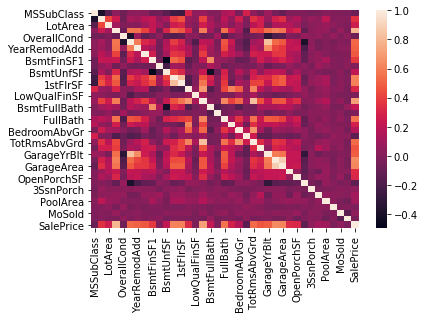

In [8]:
#Checking correlation among numeric features
del numeric_data['Id'] #Remove ID column
corr = numeric_data.corr()
sns.heatmap(corr)

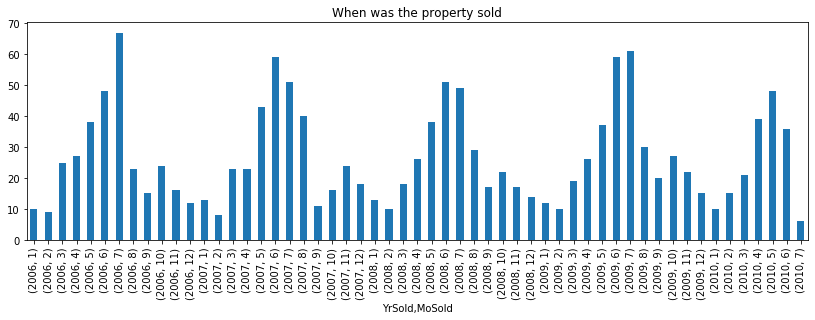

In [9]:
#Insights

#When was the property sold in which year and month
df_train.groupby(["YrSold", "MoSold"]).Id.count().plot(kind="bar", figsize = (14,4))
plt.title("When was the property sold")
plt.show()

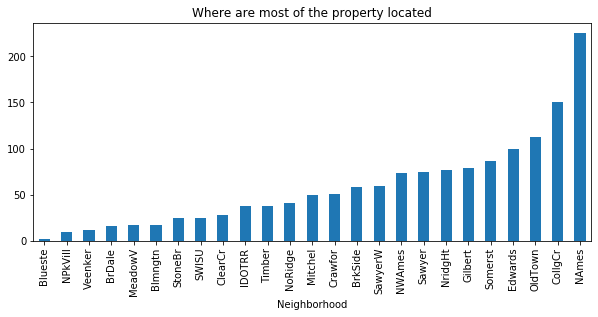

In [10]:
#Insights

#Where are the property located
df_train.groupby(['Neighborhood']).Id.count().sort_values().plot(kind="bar", figsize = (10,4))
plt.title("Where are most of the property located")
plt.show()

In [11]:
#Insights
#How expensive are the houses?
print('The cheapest house is ${:,.0f} and the most expensive is ${:,.0f}'.format(
    df_train.SalePrice.min(), df_train.SalePrice.max()))
print('The average sales price is ${:,.0f}, and median is ${:,.0f}'.format(
    df_train.SalePrice.mean(), df_train.SalePrice.median()))

The cheapest house is $34,900 and the most expensive is $755,000
The average sales price is $180,921, and median is $163,000


In [12]:
#Conversion from numeric feature to category feature because they 
df_train['MSSubClass'] = df_train.MSSubClass.apply(lambda x: str(x))
df_train['MoSold'] = df_train.MoSold.apply(lambda x: str(x))
df_train['YrSold'] = df_train.YrSold.apply(lambda x: str(x))

In [13]:
#Checking for cateorical data
numeric_data = df_train.select_dtypes(include = [np.number])
categorical_data = df_train.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical features in the training data'.format(numeric_data.shape[1], categorical_data.shape[1]))

There are 35 numerical and 46 categorical features in the training data


In [14]:
#Converting Categorical Features to Numerical Features

# Alley
df_train.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
df_train.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
df_train.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
df_train.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
df_train.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
df_train.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
df_train.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
df_train.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
df_train.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
df_train.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
df_train.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
df_train.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
df_train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
df_train.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
df_train.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
df_train.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
df_train.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
df_train.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
df_train.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
df_train.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
df_train.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)


In [15]:
# Set all Missing Values from the above Cat-Num C0nversions to ZERO(0)
cat_num = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']
df_train[cat_num] = df_train[cat_num].fillna(0)

In [16]:
#Checking for cateorical data
numeric_data = df_train.select_dtypes(include = [np.number])
categorical_data = df_train.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical features in the training data'.format(numeric_data.shape[1], categorical_data.shape[1]))

There are 56 numerical and 25 categorical features in the training data


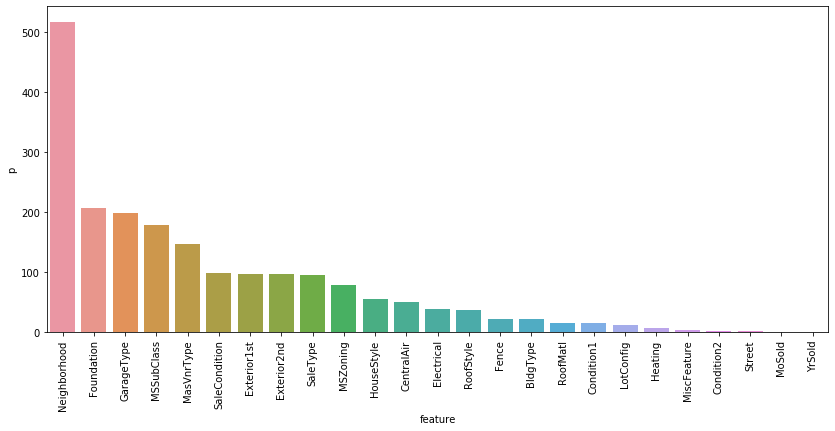

In [17]:
#We will run a one-way ANOVA tests for each categorical feature againt SalePrice.
import scipy.stats
cat_features = categorical_data.columns
df_train[cat_features] = df_train[cat_features].fillna('Missing')
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in df_train[cat].unique():
        group_prices.append(df_train[df_train[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

In [18]:
#Handling Missing Values
missing_values = (df_train[cat_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

MiscFeature    1406
Fence          1179
GarageType       81
MasVnrType        8
Electrical        1
dtype: int64

In [19]:
df_train.loc[df_train.Electrical == 'Missing', 'Electrical'] = df_train.Electrical.mode()[0]

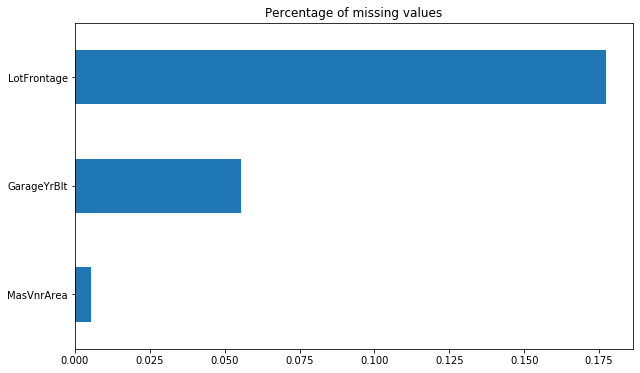

In [20]:
# Remaining missing values
missing_data = df_train.isnull().sum() / df_train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [21]:
df_train.LotFrontage = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_train.MasVnrArea.fillna(0, inplace=True)
df_train.GarageYrBlt.fillna(0, inplace=True)

In [22]:
# Let's look closely at MasVnrType field here
#First, Lets correct our assignment
df_train.MasVnrType.replace({'Missing':'None'}, inplace=True)
#Second, we replace with mean
df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' 
df_train.loc[(df_train.MasVnrType == 'None') & (df_train.MasVnrArea == 1), 'MasVnrArea'] = 0 
for vnr_type in df_train.MasVnrType.unique():
    df_train.loc[(df_train.MasVnrType == vnr_type) & (df_train.MasVnrArea == 0), 'MasVnrArea'] = \
        df_train[df_train.MasVnrType == vnr_type].MasVnrArea.mean() 

In [23]:
#Check whether duplicates are available
print('Train set duplicate IDs: {}'.format(df_train.duplicated('Id').sum()))
print('Test set duplicate IDs: {}'.format(df_train.duplicated('Id').sum()))

Train set duplicate IDs: 0
Test set duplicate IDs: 0


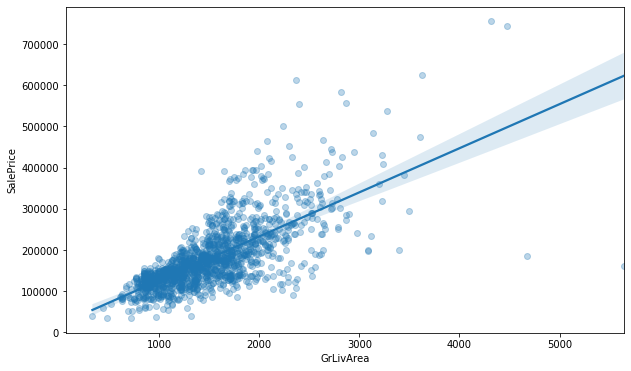

In [24]:
#Check for outliers
plt.figure(figsize=(10,6))
sns.regplot(df_train.GrLivArea, df_train.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [25]:
#Removing Houses which has more 4000 sq ft
df_train.drop(df_train[df_train.GrLivArea >= 4000].index, inplace=True)

In [26]:
# Creating Some more Features

# Calculating Total Square feet
df_train['TotalSF'] = df_train.TotalBsmtSF + df_train.GrLivArea
df_train['TotalFloorSF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['TotalPorchSF'] = df_train.OpenPorchSF + df_train.EnclosedPorch + \
    df_train['3SsnPorch'] + df_train.ScreenPorch

In [27]:
# Lets create some Booleans features
df_train['HasBasement'] = df_train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasGarage'] = df_train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPorch'] = df_train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
df_train['HasPool'] = df_train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
df_train['WasRemodeled'] = (df_train.YearRemodAdd != df_train.YearBuilt).astype(np.int64)
df_train['IsNew'] = (df_train.YearBuilt > 2000).astype(np.int64)
df_train['WasCompleted'] = (df_train.SaleCondition != 'Partial').astype(np.int64)

boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 
                    'WasRemodeled', 'IsNew', 'WasCompleted']

In [28]:
#Checking for cateorical data
numeric_data = df_train.select_dtypes(include = [np.number])
categorical_data = df_train.select_dtypes(exclude = [np.number])
print('There are {0} numerical and {1} categorical features in the training data'.format(numeric_data.shape[1], categorical_data.shape[1]))
num_features = numeric_data.columns
cat_features = categorical_data.columns

There are 66 numerical and 25 categorical features in the training data


In [29]:
#Separate boolean featured from numerical
num_features = [f for f in num_features if f not in boolean_features]

In [30]:
# Total Bathrooms (Still creating some more features)
df_train['TotalBathrooms'] = df_train.FullBath + .5 * df_train.HalfBath + \
    df_train.BsmtFullBath + .5 * df_train.BsmtHalfBath


In [31]:
#Performing Log Transform
features = num_features + ['SalePrice']
for f in features:
    df_train.loc[:,f] = np.log1p(df_train[f])

In [32]:
#Applying One hot encoding, after dropping some features
y = df_train['SalePrice']
df_train.drop('SalePrice', axis=1, inplace=True)
df_train.drop('Id', axis=1, inplace=True)
model_data = pd.get_dummies(df_train).copy()

In [33]:
#We can Modelling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(model_data.copy(), y, test_size=0.3, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)

Shapes
X_train: (1019, 263)
X_val: (437, 263)
y_train: (1019,)
y_val: (437,)


In [35]:
from sklearn.preprocessing import RobustScaler, StandardScaler
# Remove Id and SalePrice from num_features
num_features.remove('Id')
num_features.remove('SalePrice')
stdsc = StandardScaler()
X_train.loc[:,num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.transform(X_test[num_features])

In [37]:
from sklearn.model_selection import cross_val_score
def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']


param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(
    rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.00884 | Test RSME: 0.00915 | alpha: 0.00006


LASSO dropped 165 of 263 features.


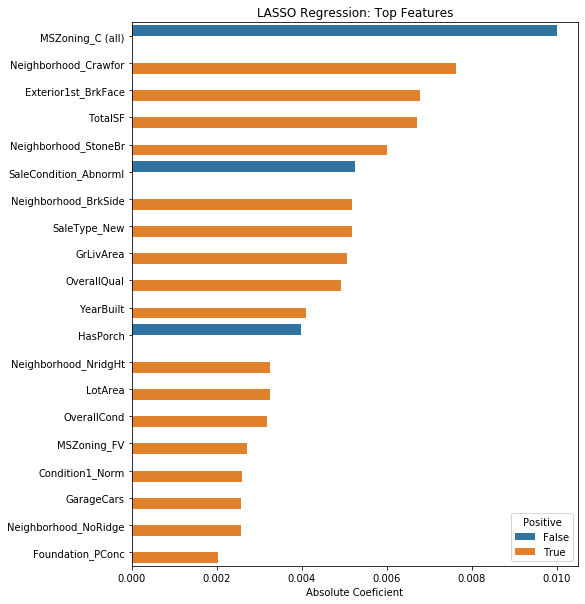

In [39]:
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()


In [44]:
#Applying XGBOOST
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight =1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)
regr.fit(X_train[top_coefs.index], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=1, subsample=0.2, verbosity=1)

In [45]:
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))
y_pred = regr.predict(X_test[top_coefs.index])
print("XGBoost score on training set: ", rmse(y_test, y_pred))

XGBoost score on training set:  0.014189027041757778


In [49]:
y_pred

array([2.5727408, 2.571263 , 2.554017 , 2.550572 , 2.5162046, 2.5069711,
       2.5805478, 2.5433395, 2.5569003, 2.5544615, 2.5470922, 2.5869312,
       2.5775259, 2.5920615, 2.5425034, 2.5411398, 2.5836875, 2.534206 ,
       2.596121 , 2.5880613, 2.507252 , 2.5898561, 2.5300589, 2.546096 ,
       2.5842164, 2.5680583, 2.5448594, 2.5344937, 2.5549345, 2.5613422,
       2.540707 , 2.5829017, 2.5338902, 2.5339677, 2.5489485, 2.5837336,
       2.5955033, 2.5568645, 2.5900064, 2.5382721, 2.551317 , 2.5929682,
       2.5713668, 2.5596523, 2.5962548, 2.5887668, 2.5752242, 2.5485647,
       2.5662713, 2.5397832, 2.5704744, 2.5535607, 2.5891826, 2.545226 ,
       2.5780616, 2.5952363, 2.5839458, 2.5864525, 2.5588887, 2.563276 ,
       2.511208 , 2.5959952, 2.5951939, 2.5378644, 2.5952785, 2.5802433,
       2.5952706, 2.595478 , 2.5371838, 2.566866 , 2.566245 , 2.5594594,
       2.5553396, 2.5401237, 2.555214 , 2.5540483, 2.5954788, 2.5539389,
       2.5516992, 2.5363445, 2.5388274, 2.580543 , 